In [133]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from languages import LANGUAGES

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [134]:
loaded_df = pd.read_csv("English_Processed.csv")

## Phonetic Inventory

In [135]:
print(len(loaded_df))

125938


In [136]:
# Extract the list of pronunciations
pronunciation_list = []
for p in loaded_df['pronunciation']:
    pronunciation_list.append(str(p))

In [137]:
print(len(pronunciation_list))

125938


In [138]:
# Print a histogram of the different symbols
symbols_hist = {}

for P in pronunciation_list:
    # Make use of only the narrow transcriptions.
    for x in P:
        if x in symbols_hist.keys():
            symbols_hist[x] += 1
        else:
            symbols_hist[x] = 1  

# Sort the symbols 
symbols = sorted(symbols_hist, key = lambda x: symbols_hist[x], reverse = True)

In [139]:
total = np.sum(list(symbols_hist.values()))
rare_symbols = []
uni_percent = 1/len(symbols_hist)
for x in symbols:
    percent = symbols_hist[x] / total * 100
    zipf_factor = percent / (symbols_hist[symbols[0]] / total * 100)  
    if (zipf_factor < uni_percent):
        rare_symbols.append(x)
        
print(rare_symbols) 

['̃', 'ɐ', 'ʔ', 'ʉ', 'ɘ', 'x', 'ʍ', '̥', '‿', '̠', 'ɨ', '̚', '˦', '̈', '˨', '̪', 'ʷ', 'ä', '˧', 'ɵ', '̞', '̊', 'ʁ', '̆', 'ɬ', 'ˑ', '˩', 'ɱ', 'ɯ', '˞', '̟', 'y', '~', '˥', 'ç', 'ø', 'ʈ', 'ɻ', '˔', '̬', 'ʲ', '̝', 'ɖ', 'œ', 'ˀ', 'ʱ', 'ɕ', 'ɲ', 'ɸ', 'ʏ', 'ᵊ', 'ʋ', 'χ', 'ẽ', 'ĩ', '‖', 'õ', 'ˤ', 'ũ', '̰', 'ɦ', 'ʼ', 'c', '|', 'ã', 'ɣ', 'ǀ', 'ⁿ', '̍', '²', 'ɳ', 'β', 'ŏ', 'q', 'ɞ', 'ˠ', 'ɤ', 'ɟ', 'ᵈ', '⁵', 'ǃ', '͜', 'ʙ', 'ħ', 'ă', 'ɭ', '̀', 'ʀ', 'ʎ', '↓', '¹', '̙', 'ï', '᷈', 'ā', 'á', 'ʟ', "'", 'ö', 'ʘ', 'ˡ', 'ᵻ', 'ǁ', 'ĭ', 'ŭ', 'ɥ', 'ɴ', 'ɓ', '̜', '˗', '͇', 'ü', 'ʝ', '³', '⁰', 'ʐ', 'ḿ', '↗', '︎', 'ʬ', '…', '́', 'ì', 'ó', '̘', 'ō', '*', 'ʂ', '⁴', 'ɽ', '̽', 'à', 'ò', 'ʩ', '𐞪']


In [140]:
# Remove entries with rare symbols from the dataset
final_list = []
for p in pronunciation_list:
    x : str = p
    banned = False
    for rare in rare_symbols:
        if x.find(rare) >= 0: 
            banned = True 
            break 

    if not banned:
        final_list.append(x)

In [141]:
pronunciation_list = final_list
print(len(pronunciation_list))

122576


In [142]:
for s in symbols:
    if s == "/" or s == "[" or s == "]":
        continue 
    print(s)

ˈ
ə
ɪ
t
n
.
s
ɹ
l
k
d
ː
i
m
ʊ
ˌ
p
ɛ
æ
b
a
ɑ
e
f
z
ʃ
ɡ
ɔ
u
ɒ
(
)
v
o
ʌ
 
͡
j
ʒ
w
ŋ
h
ɚ
θ
-
ɜ
̩
ɝ
r
ð
ɾ
̯
ɫ
ʰ
̃
ɐ
ʔ
ʉ
ɘ
x
ʍ
̥
‿
̠
ɨ
̚
˦
̈
˨
̪
ʷ
ä
˧
ɵ
̞
̊
ʁ
̆
ɬ
ˑ
˩
ɱ
ɯ
˞
̟
y
~
˥
ç
ø
ʈ
ɻ
˔
̬
ʲ
̝
ɖ
œ
ˀ
ʱ
ɕ
ɲ
ɸ
ʏ
ᵊ
ʋ
χ
ẽ
ĩ
‖
õ
ˤ
ũ
̰
ɦ
ʼ
c
|
ã
ɣ
ǀ
ⁿ
̍
²
ɳ
β
ŏ
q
ɞ
ˠ
ɤ
ɟ
ᵈ
⁵
ǃ
͜
ʙ
ħ
ă
ɭ
̀
ʀ
ʎ
↓
¹
̙
ï
᷈
ā
á
ʟ
'
ö
ʘ
ˡ
ᵻ
ǁ
ĭ
ŭ
ɥ
ɴ
ɓ
̜
˗
͇
ü
ʝ
³
⁰
ʐ
ḿ
↗
︎
ʬ
…
́
ì
ó
̘
ō
*
ʂ
⁴
ɽ
̽
à
ò
ʩ
𐞪


In [143]:
print(len(symbols))

189


# Tokenizer

In [144]:
from tokenizers import Tokenizer, models, processors, decoders
import pandas as pd 
import numpy as np
from languages import LANGUAGES

In [145]:
loaded_df = pd.read_csv("English_Processed.csv")
loaded_df.head()

,Unnamed: 0,pronunciation,word,language
0,0,pəˈsɛnt,%,English
1,1,pɚˈsɛnt,%,English
2,2,kʊŋ,!kung,English
3,3,ǃkʊŋ,!kung,English
4,4,ænd lɪt,&lit,English


In [146]:
from solution import CharacterTokenizer, PhoneticTransformer, generate_square_subsequent_mask, PhoneticsDataset
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt

In [147]:
from tokenizers import Tokenizer, AddedToken
from tokenizers.trainers import WordPieceTrainer

pronunciation_tokenizer = Tokenizer(models.WordPiece(unk_token="[UNK]"))
pronunciation_tokenizer.train_from_iterator(pronunciation_list, WordPieceTrainer(vocab_size=200))
pronunciation_tokenizer.add_special_tokens([
    "[BOS]", "[EOS]", "[SEP]", "[PAD]", "[MASK]", "[UNK]", "[CLS]"
    ])
pronunciation_tokenizer.post_processor = processors.TemplateProcessing(
    single = f"[CLS]:0 $A:0 [SEP]:0",
    pair = f"[CLS]:0 $A:0 [SEP]:0 $B:1 [SEP]:1",
    special_tokens=[("[CLS]", pronunciation_tokenizer.get_vocab()["[CLS]"]),
                    ("[SEP]", pronunciation_tokenizer.get_vocab()["[SEP]"])
    ]
)
pronunciation_tokenizer.decoder = decoders.WordPiece()
vocab = pronunciation_tokenizer.get_vocab()
print(len(vocab))

10007


In [148]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device, len(vocab))

cuda 10007


In [149]:
dataset = []
for p in pronunciation_list:
    tok = pronunciation_tokenizer.encode(p)
    row = []
    for t in tok.ids: 
        row.append(t)
        # dataset.append(row.copy())      
    dataset.append(row)

5.17491189139799 8.0 1.3558766139235021
3 27


(array([2.7770e+03, 4.0478e+04, 4.0796e+04, 2.1949e+04, 9.9370e+03,
        3.8290e+03, 1.5570e+03, 6.0800e+02, 2.8300e+02, 1.6100e+02,
        6.4000e+01, 5.0000e+01, 2.9000e+01, 1.6000e+01, 8.0000e+00,
        7.0000e+00, 7.0000e+00, 5.0000e+00, 4.0000e+00, 3.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 5.0000e+00]),
 array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.,
        16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.]),
 <BarContainer object of 24 artists>)

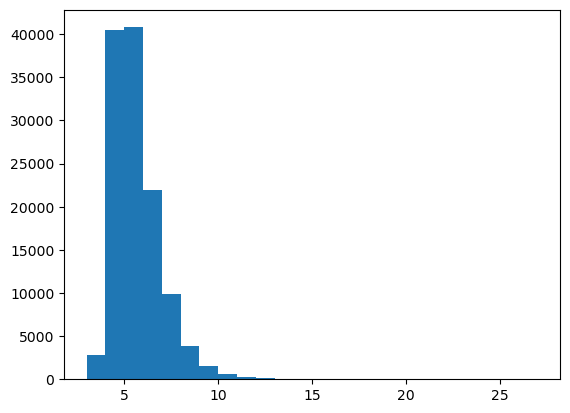

In [150]:
lengths = []
for i in dataset: 
    lengths.append(len(i))

print(np.mean(lengths), np.quantile(lengths, 0.975), np.std(lengths))
print(np.min(lengths), np.max(lengths))
plt.hist(lengths, np.max(lengths) - np.min(lengths))

In [151]:
# Remove any outliers
min_thresh = 3
max_thresh = np.quantile(lengths, 0.975)

work_set = []

for p in dataset:
    if len(p) >= min_thresh and len(p) <= max_thresh:
        work_set.append(p)

dataset = work_set

print(len(dataset))

119766


5.060768498572216 8.0 1.1090143012451683
3 8


(array([ 2777., 40478., 40796., 21949., 13766.]),
 array([3., 4., 5., 6., 7., 8.]),
 <BarContainer object of 5 artists>)

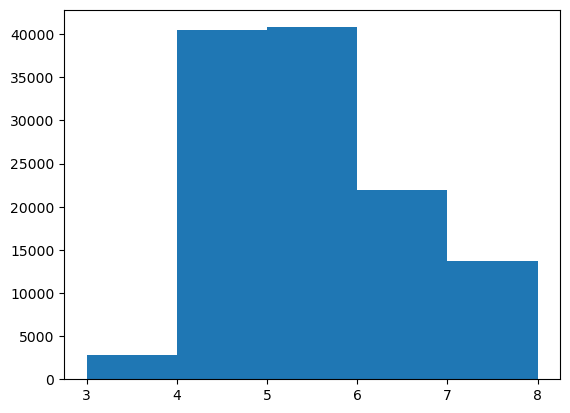

In [152]:
lengths = []
for i in dataset: 
    lengths.append(len(i))

print(np.mean(lengths), np.quantile(lengths, 0.975), np.std(lengths))
print(np.min(lengths), np.max(lengths))
plt.hist(lengths, np.max(lengths) - np.min(lengths))

In [153]:
SEQ_LEN = int(np.max(lengths))
BATCH_SIZE = 1024

{63: 3127, 65: 2784, 78: 2631, 58: 2503, 72: 2345, 62: 2309, 70: 2224, 131: 1828, 80: 1812, 59: 1697, 81: 1637, 54: 1448, 56: 1299, 117: 1220, 109: 1178, 123: 1094, 75: 1039, 124: 1018, 113: 994, 61: 971, 146: 923, 92: 892, 158: 883, 127: 869, 136: 865, 95: 860, 140: 858, 84: 822, 149: 807, 108: 796, 148: 765, 137: 731, 93: 692, 87: 639, 114: 637, 100: 616, 64: 612, 21: 603, 14: 593, 142: 577, 122: 574, 284: 570, 37: 557, 177: 554, 154: 537, 208: 531, 150: 521, 110: 512, 116: 502, 67: 500, 175: 497, 120: 490, 198: 474, 162: 472, 9: 469, 134: 468, 169: 461, 42: 460, 179: 452, 18: 439, 223: 439, 216: 433, 119: 430, 167: 430, 271: 427, 71: 426, 112: 425, 315: 424, 196: 421, 202: 416, 300: 415, 238: 412, 77: 411, 219: 404, 184: 403, 329: 400, 249: 400, 115: 398, 144: 397, 181: 394, 350: 393, 125: 393, 82: 391, 244: 391, 130: 388, 250: 385, 344: 384, 330: 380, 94: 375, 206: 374, 91: 372, 193: 370, 24: 369, 360: 369, 165: 365, 139: 364, 310: 362, 322: 361, 361: 358, 156: 357, 431: 357, 143: 

<BarContainer object of 9923 artists>

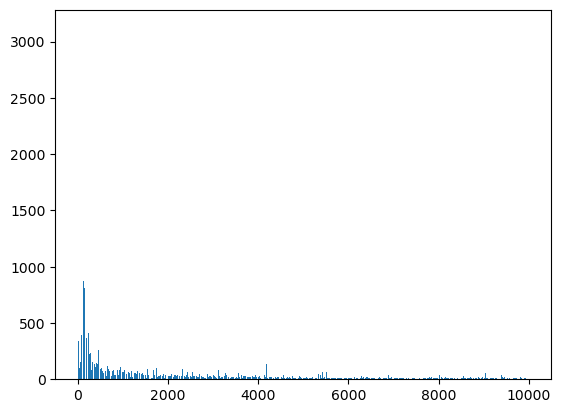

In [154]:
symbols_hist = {}
for d in dataset:
    for x in d[1:-1]:
        if x in symbols_hist.keys():
            symbols_hist[x] += 1
        else:
            symbols_hist[x] = 1  
sorted_hist =dict(sorted(symbols_hist.items(), key=lambda item: item[1], reverse=True)) 
print(sorted_hist)
plt.bar(sorted_hist.keys(), sorted_hist.values())

In [22]:
# final = []
# for d in dataset:
#     row = []
#     for t in d: 
#         row.append(t)
#         final.append(row.copy())      
#     row.reverse()

# dataset = final

In [23]:
phonetics_dataset = PhoneticsDataset(dataset, vocab, SEQ_LEN)
dataloader = DataLoader(phonetics_dataset, batch_size=BATCH_SIZE, shuffle=True)
phonetics_model = PhoneticTransformer(len(vocab), max_seq_len=SEQ_LEN)
phonetics_model = phonetics_model.to(device)

c:\Users\Joaquin\miniconda3\envs\agi\Lib\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [24]:
optimizer = optim.Adam(phonetics_model.parameters(), lr = 0.0001)
criterion = nn.CrossEntropyLoss(ignore_index=vocab.get("[PAD]"))
EPOCHS = 50

for epoch in range(EPOCHS):
    phonetics_model.train()
    total_loss = 0

    for i, (input_ids, target_ids) in tqdm(enumerate(dataloader), total=len(dataloader)):
        input_ids = input_ids.to(device)
        target_ids = target_ids.to(device)
        optimizer.zero_grad()
        tgt_mask = generate_square_subsequent_mask(input_ids.size(1)).to(device)

        output = phonetics_model(input_ids, tgt_mask = tgt_mask)
        loss = criterion(output.permute(1, 2, 0), target_ids)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()

    if ((epoch + 1) % 10 == 0):
        torch.save(phonetics_model.state_dict(), f"model{(epoch//10)}")
        
    print(f"Epoch {epoch + 1} Train Loss: {total_loss / len(dataloader)}")

  0%|          | 0/118 [00:00<?, ?it/s]c:\Users\Joaquin\miniconda3\envs\agi\Lib\site-packages\torch\nn\functional.py:5560: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)
100%|██████████| 118/118 [00:11<00:00,  9.90it/s]


Epoch 1 Train Loss: 4.006681341235921


100%|██████████| 118/118 [00:11<00:00, 10.25it/s]


Epoch 2 Train Loss: 3.3384860956062705


100%|██████████| 118/118 [00:11<00:00, 10.40it/s]


Epoch 3 Train Loss: 3.0107477357832053


100%|██████████| 118/118 [00:11<00:00, 10.16it/s]


Epoch 4 Train Loss: 2.8214422949289872


100%|██████████| 118/118 [00:11<00:00, 10.16it/s]


Epoch 5 Train Loss: 2.7011484372413763


100%|██████████| 118/118 [00:11<00:00, 10.21it/s]


Epoch 6 Train Loss: 2.6192490266541304


100%|██████████| 118/118 [00:11<00:00, 10.21it/s]


Epoch 7 Train Loss: 2.562621308585345


100%|██████████| 118/118 [00:11<00:00, 10.36it/s]


Epoch 8 Train Loss: 2.5193269070932423


100%|██████████| 118/118 [00:11<00:00, 10.22it/s]


Epoch 9 Train Loss: 2.4871014982967052


100%|██████████| 118/118 [00:11<00:00, 10.22it/s]


Epoch 10 Train Loss: 2.4604618933241245


100%|██████████| 118/118 [00:11<00:00, 10.40it/s]


Epoch 11 Train Loss: 2.437775559344534


100%|██████████| 118/118 [00:11<00:00, 10.23it/s]


Epoch 12 Train Loss: 2.4196644718364135


100%|██████████| 118/118 [00:11<00:00, 10.05it/s]


Epoch 13 Train Loss: 2.4039304054389565


100%|██████████| 118/118 [00:11<00:00, 10.06it/s]


Epoch 14 Train Loss: 2.3889349012051597


100%|██████████| 118/118 [00:11<00:00, 10.24it/s]


Epoch 15 Train Loss: 2.376896658186185


100%|██████████| 118/118 [00:11<00:00, 10.10it/s]


Epoch 16 Train Loss: 2.3658764726024564


100%|██████████| 118/118 [00:11<00:00, 10.07it/s]


Epoch 17 Train Loss: 2.354857466988644


100%|██████████| 118/118 [00:11<00:00, 10.06it/s]


Epoch 18 Train Loss: 2.346973493947821


100%|██████████| 118/118 [00:11<00:00, 10.06it/s]


Epoch 19 Train Loss: 2.3382870241747065


100%|██████████| 118/118 [00:11<00:00, 10.01it/s]


Epoch 20 Train Loss: 2.331240237769434


100%|██████████| 118/118 [00:11<00:00, 10.22it/s]


Epoch 21 Train Loss: 2.3249458781743453


100%|██████████| 118/118 [00:11<00:00, 10.05it/s]


Epoch 22 Train Loss: 2.318533499362105


100%|██████████| 118/118 [00:11<00:00, 10.05it/s]


Epoch 23 Train Loss: 2.313190916837272


100%|██████████| 118/118 [00:11<00:00, 10.04it/s]


Epoch 24 Train Loss: 2.306380615396015


100%|██████████| 118/118 [00:11<00:00, 10.05it/s]


Epoch 25 Train Loss: 2.302239973666304


100%|██████████| 118/118 [00:11<00:00, 10.02it/s]


Epoch 26 Train Loss: 2.29769454770169


100%|██████████| 118/118 [00:11<00:00, 10.24it/s]


Epoch 27 Train Loss: 2.291584332110518


100%|██████████| 118/118 [00:11<00:00, 10.07it/s]


Epoch 28 Train Loss: 2.2875417188062506


100%|██████████| 118/118 [00:11<00:00, 10.05it/s]


Epoch 29 Train Loss: 2.2840903007378013


100%|██████████| 118/118 [00:11<00:00, 10.01it/s]


Epoch 30 Train Loss: 2.2792990793616084


100%|██████████| 118/118 [00:11<00:00,  9.84it/s]


Epoch 31 Train Loss: 2.2752212003125982


100%|██████████| 118/118 [00:12<00:00,  9.78it/s]


Epoch 32 Train Loss: 2.2719943341562305


100%|██████████| 118/118 [00:12<00:00,  9.67it/s]


Epoch 33 Train Loss: 2.268444746227588


100%|██████████| 118/118 [00:12<00:00,  9.71it/s]


Epoch 34 Train Loss: 2.264727580345283


100%|██████████| 118/118 [00:11<00:00,  9.94it/s]


Epoch 35 Train Loss: 2.2614204297631475


100%|██████████| 118/118 [00:11<00:00,  9.97it/s]


Epoch 36 Train Loss: 2.258627935991449


100%|██████████| 118/118 [00:11<00:00, 10.00it/s]


Epoch 37 Train Loss: 2.2568243843013955


100%|██████████| 118/118 [00:11<00:00, 10.12it/s]


Epoch 38 Train Loss: 2.252844976166547


100%|██████████| 118/118 [00:11<00:00,  9.98it/s]


Epoch 39 Train Loss: 2.2504394539331987


100%|██████████| 118/118 [00:11<00:00,  9.95it/s]


Epoch 40 Train Loss: 2.2471205905332403


100%|██████████| 118/118 [00:11<00:00,  9.96it/s]


Epoch 41 Train Loss: 2.2445887347399176


100%|██████████| 118/118 [00:11<00:00, 10.14it/s]


Epoch 42 Train Loss: 2.24174511836747


100%|██████████| 118/118 [00:11<00:00,  9.92it/s]


Epoch 43 Train Loss: 2.24115635985035


100%|██████████| 118/118 [00:11<00:00,  9.97it/s]


Epoch 44 Train Loss: 2.2393176919322904


100%|██████████| 118/118 [00:11<00:00, 10.00it/s]


Epoch 45 Train Loss: 2.234912288390984


100%|██████████| 118/118 [00:11<00:00,  9.98it/s]


Epoch 46 Train Loss: 2.234192929025424


100%|██████████| 118/118 [00:11<00:00, 10.13it/s]


Epoch 47 Train Loss: 2.2317794925075467


100%|██████████| 118/118 [00:11<00:00,  9.91it/s]


Epoch 48 Train Loss: 2.2295165910559187


100%|██████████| 118/118 [00:11<00:00,  9.96it/s]


Epoch 49 Train Loss: 2.2278733152454184


100%|██████████| 118/118 [00:11<00:00,  9.98it/s]

Epoch 50 Train Loss: 2.2256674503875993


In [25]:
def generate_text(model, max_length=100, start_seq=[], end_token="[EOS]", temperature=1.0, p=0.9, beam_width=5):
    # Initialize beams with the start token and start_seq
    beams = [(start_seq, 0)]  # Each beam is a tuple (sequence, score)
    final_list = []
    for _ in range(max_length):
        all_candidates = []
        
        # Expand each beam
        for seq, score in beams:
            if end_token in seq and len(seq) > 5:
                final_list.append((seq, score))
            elif len(seq) >= max_length:
                final_list.append((seq, score))
            else:  
                input_ids = torch.tensor([seq], dtype=torch.long).to(device)
                tgt_mask = generate_square_subsequent_mask(input_ids.size(1)).to(device)
                
                with torch.no_grad():
                    output = model(input_ids, tgt_mask)
                    
                next_token_logits = output[0, -1] / temperature
                probs = torch.nn.functional.softmax(next_token_logits, dim=-1)
                sorted_probs, sorted_indices = torch.sort(probs, descending=True)
                cum_prob = torch.cumsum(sorted_probs, dim=-1)
                cutoff_index = torch.searchsorted(cum_prob, p)
                
                sorted_probs = sorted_probs[:cutoff_index + 1]
                sorted_indices = sorted_indices[:cutoff_index + 1]
                
                toks_to_choose = torch.multinomial(sorted_probs, min(beam_width, len(sorted_probs) - 1))
                # Generate candidates from current beam
                for tok in toks_to_choose:
                    next_token_id = sorted_indices[tok].item()
                    candidate_seq = seq + [next_token_id]
                    candidate_score = (score + torch.log(sorted_probs[tok]).item()) / (len(candidate_seq))
                    
                    all_candidates.append((candidate_seq, candidate_score))
        
        # Select top beam_width candidates
        all_candidates.sort(key=lambda x: x[1], reverse=True)
        beams = all_candidates[:beam_width]
    
    # Return the sequence with the highest score
    beams = beams + final_list
    beams.sort(key = lambda x : x[1], reverse = True)
    return beams[0]


In [26]:
params = sum(p.numel() for p in phonetics_model.parameters())
print(params)

346867


In [28]:
# phonetics_model = PhoneticTransformer(len(vocab), max_seq_len=SEQ_LEN)
# phonetics_model.load_state_dict(torch.load("model5"))
phonetics_model.eval()
phonetics_model.to(device)
for _ in range(0, 10):
    start_seq = pronunciation_tokenizer.encode("fæɹ").ids[:-1]

    test, score = generate_text(phonetics_model, max_length=SEQ_LEN, start_seq=start_seq, end_token=vocab["[SEP]"], temperature = 1.0, p = 0.95, beam_width=5)
    print(len(test) - 2, score, pronunciation_tokenizer.decode(test))

19 -0.03645364715687176 fæɹ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ
19 -0.03645364715687176 fæɹ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ
19 -0.03645364715687176 fæɹ s ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ
19 -0.03645364715687176 fæɹ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ
19 -0.03645364715687176 fæɹ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ
19 -0.03645364715687176 fæɹ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ
19 -0.03645364715687176 fæɹ k ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ
19 -0.03645364715687176 fæɹ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ
19 -0.03645364715687176 fæɹ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ
19 -0.03645364715687176 fæɹ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ ˈ
